In [18]:
from dotenv import load_dotenv
import os
from PIL import Image
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.sql import text
import pandas as pd

load_dotenv()

PROJECT_DIR = os.getenv("PROJECT_DIR")
LEAFLET_DIR = os.path.join(PROJECT_DIR, "crawled_leaflets")
DABASE_PATH = os.path.join(LEAFLET_DIR, "supermarket_leaflets.db")
DEALS_DIR = os.path.join(PROJECT_DIR, "deals")

In [22]:
# read all deals from the database and join them with leaflet (with column names)
engine = create_engine(f"sqlite:///{DABASE_PATH}")

query = text(r"SELECT * FROM deals JOIN leaflet ON deals.leaflet_id = leaflet.leaflet_id")
deals_df = pd.read_sql_query(query, engine)

display(deals_df.head(), deals_df.shape, deals_df.columns)

,id,leaflet_id,page_num,deal_category,img_name,orig_img_size,deal_img_size,polygon_points_abs,polygon_points_rel,bbox_points_abs,...,leaflet_id,supermarket_id,supermarket_leaflet_name,num_pages,downloaded_pages,crawl_date,valid_from_date,valid_to_date,url,processed
0,1,2438983,10,Deal,lidl_2438983_10_1.png,"1199,2000","573,636","[[605.7499905776978, 1268.7499237060547], [605...","[[50.52126693725586, 63.437496185302734], [50....","605,1268,1177,1903",...,2438983,9,lidl,29,29,2024-10-05 18:39:12.000000,1900-01-01,1900-01-01,,1
1,2,2438983,10,Deal,lidl_2438983_10_2.png,"1199,2000","573,648","[[605.7499905776978, 631.2500381469727], [605....","[[50.52126693725586, 31.562501907348633], [50....","605,631,1177,1278",...,2438983,9,lidl,29,29,2024-10-05 18:39:12.000000,1900-01-01,1900-01-01,,1
2,3,2438983,10,Deal,lidl_2438983_10_3.png,"1199,2000","573,411","[[30.75000269651413, 868.75], [30.750002696514...","[[2.5646374225616455, 43.4375], [2.56463742256...","30,868,602,1278",...,2438983,9,lidl,29,29,2024-10-05 18:39:12.000000,1900-01-01,1900-01-01,,1
3,4,2438983,10,Deal,lidl_2438983_10_4.png,"1199,2000","585,545","[[808.8750273895264, 81.25], [808.875027389526...","[[67.46247100830078, 4.0625], [67.462471008300...","593,81,1177,625",...,2438983,9,lidl,29,29,2024-10-05 18:39:12.000000,1900-01-01,1900-01-01,,1
4,5,2438983,11,Deal,lidl_2438983_11_5.png,"1199,2000","436,623","[[755.7499931335449, 643.75], [755.74999313354...","[[63.03169250488281, 32.1875], [63.03169250488...","755,643,1190,1265",...,2438983,9,lidl,29,29,2024-10-05 18:39:12.000000,1900-01-01,1900-01-01,,1


(34074, 29)

Index(['id', 'leaflet_id', 'page_num', 'deal_category', 'img_name',
       'orig_img_size', 'deal_img_size', 'polygon_points_abs',
       'polygon_points_rel', 'bbox_points_abs', 'bbox_points_rel',
       'polygon_conf', 'title', 'clean_title', 'description', 'price',
       'price_old', 'discount', 'category', 'leaflet_id', 'supermarket_id',
       'supermarket_leaflet_name', 'num_pages', 'downloaded_pages',
       'crawl_date', 'valid_from_date', 'valid_to_date', 'url', 'processed'],
      dtype='object')

In [34]:
def get_deal_meta(deal):
    supermarket_name = deal["supermarket_leaflet_name"]
    leaflet_id = str(deal["leaflet_id"])
    page_num = str(deal["page_num"])
    img_name = deal["img_name"]
    return supermarket_name, leaflet_id, page_num, img_name

def get_deal_img_path(deal):
    supermarket_name, leaflet_id, page_num, img_name = get_deal_meta(deal)
    return os.path.join(DEALS_DIR, supermarket_name, leaflet_id, page_num, img_name)

def get_full_annotation(deal):
    supermarket_name, leaflet_id, page_num, _ = get_deal_meta(deal)
    return os.path.join(DEALS_DIR, supermarket_name, leaflet_id, f"{page_num}_annotated.jpg")

def resize_img(img_path, max_height=600):
    img = Image.open(img_path)
    width, height = img.size
    if height > max_height:
        new_height = max_height
        new_width = int(width * new_height / height)
        img = img.resize((new_width, new_height))
    return img

C:\Users\gabri\AppData\Local\Temp\ipykernel_18016\1046677610.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  rnd_deal = deals_df.sample(1, random_state=42).to_dict(orient="records")[0]


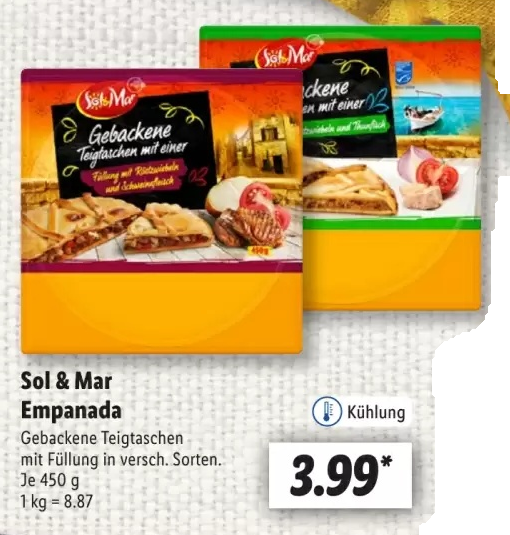

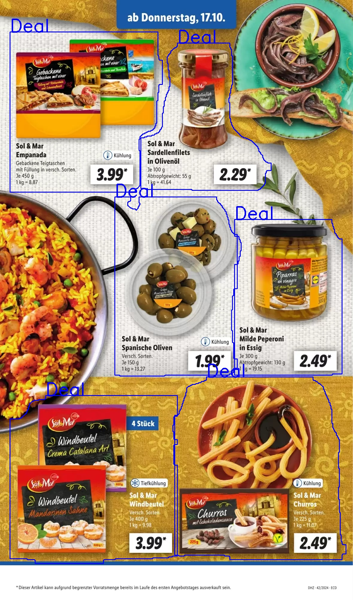

In [35]:
rnd_deal = deals_df.sample(1, random_state=42).to_dict(orient="records")[0]
display(resize_img(get_deal_img_path(rnd_deal)))
display(resize_img(get_full_annotation(rnd_deal)))